In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [55]:
#Nhập dữ liệu
df=pd.read_excel("D:\Downloads\Crawl (2).xlsx")

In [23]:
df

,Area,Address,Bedroom,Bathroom,Price
0,102,TPHCM,0,0,4200
1,120,TPHCM,14,14,28500
2,21,TPHCM,3,4,3800
3,58,TPHCM,2,3,2900
4,60,TPHCM,3,5,8900
...,...,...,...,...,...
10791,50,TPHCM,0,0,2550
10792,250,TPHCM,4,4,24000
10793,78,TPHCM,0,0,2300
10794,64,TPHCM,4,5,7300


In [ ]:
Bộ dữ liệu gôm 5 cột và 10796 dòng.

In [57]:
#Mã hoá 13 tỉnh/thành phố về dạng số (từ 0 đến 12)
df['Address']=df['Address'].astype('category')
df['Address']=df['Address'].cat.codes

In [58]:
df

,Area,Address,Bedroom,Bathroom,Price
0,102,9,0,0,4200
1,120,9,14,14,28500
2,21,9,3,4,3800
3,58,9,2,3,2900
4,60,9,3,5,8900
...,...,...,...,...,...
10791,50,9,0,0,2550
10792,250,9,4,4,24000
10793,78,9,0,0,2300
10794,64,9,4,5,7300


In [25]:
#Kiểm tra giá trị trống
df.isnull().sum()


Area        0
Address     0
Bedroom     0
Bathroom    0
Price       0
dtype: int64

In [49]:
#Xem thống kê mô tả của các biến định lượng
df.describe()

,Area,Address,Bedroom,Bathroom,Price
count,10796.000000,10796.000000,10796.000000,10796.000000,1.079600e+04
mean,163.734346,8.299463,4.138292,4.069841,2.454569e+04
std,551.364072,1.917252,5.483180,5.553023,1.659490e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,57.000000,9.000000,2.000000,2.000000,4.300000e+03
50%,81.000000,9.000000,3.000000,3.000000,8.300000e+03
75%,130.000000,9.000000,5.000000,5.000000,2.000000e+04
max,23000.000000,12.000000,100.000000,100.000000,8.500000e+06


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


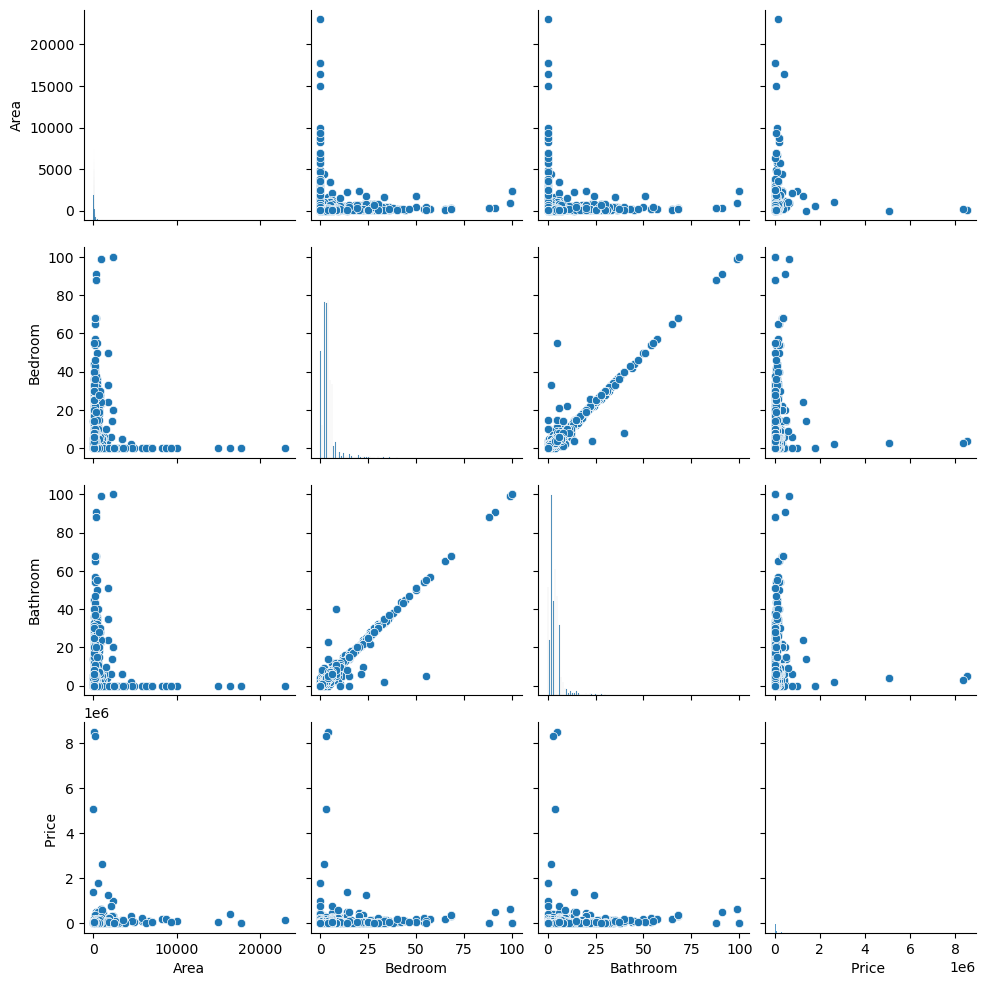

In [18]:
sns.pairplot(df)
plt.show()

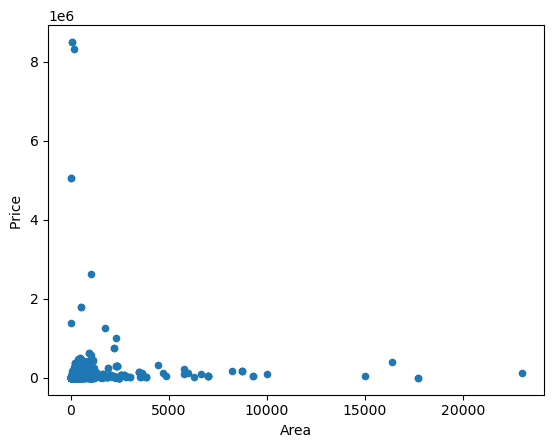

In [65]:
df.plot(kind='scatter', x='Area', y='Price ')
plt.show()

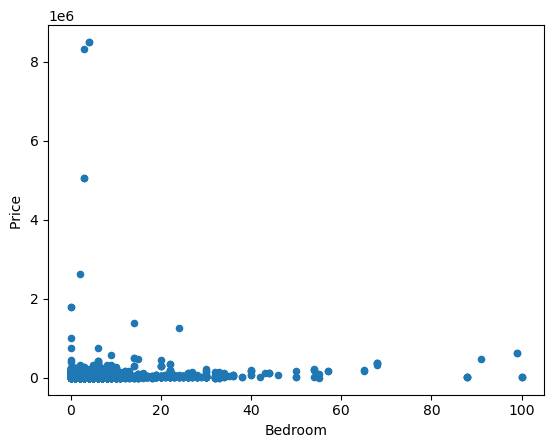

In [66]:
df.plot(kind='scatter', x='Bedroom', y='Price ')
plt.show()

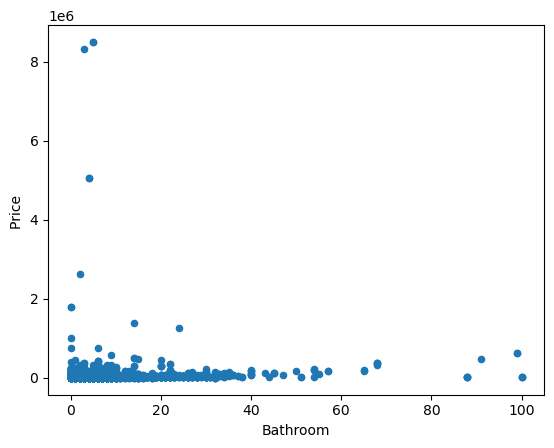

In [67]:
df.plot(kind='scatter', x='Bathroom', y='Price ')
plt.show()

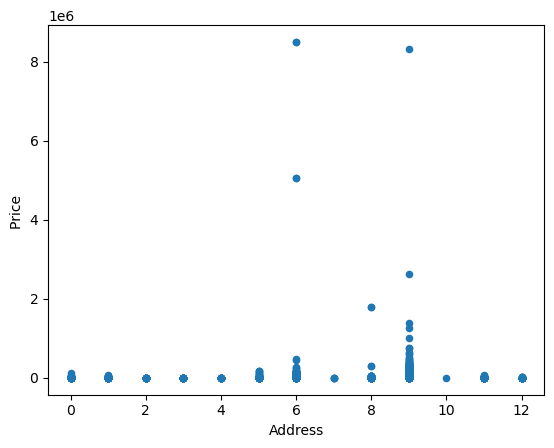

In [68]:
df.plot(kind='scatter', x='Address', y='Price ')
plt.show()

In [45]:
#Xem sự tương quan giữa các biến
df.corr()

,Area,Address,Bedroom,Bathroom,Price
Area,1.000000,-0.037824,0.016462,0.019471,0.066994
Address,-0.037824,1.000000,0.032057,0.030699,-0.001709
Bedroom,0.016462,0.032057,1.000000,0.975972,0.073057
Bathroom,0.019471,0.030699,0.975972,1.000000,0.078334
Price,0.066994,-0.001709,0.073057,0.078334,1.000000


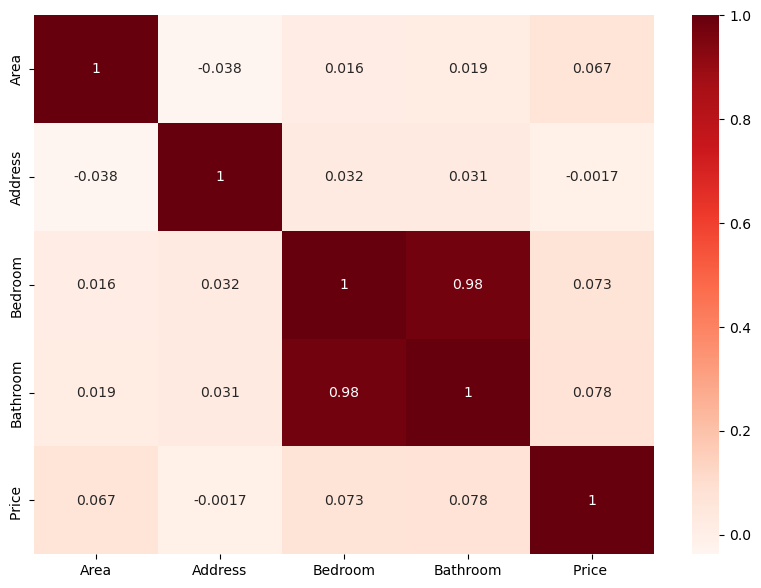

In [28]:
%matplotlib inline 
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [50]:
df

,Area,Address,Bedroom,Bathroom,Price
0,102,9,0,0,4200
1,120,9,14,14,28500
2,21,9,3,4,3800
3,58,9,2,3,2900
4,60,9,3,5,8900
...,...,...,...,...,...
10791,50,9,0,0,2550
10792,250,9,4,4,24000
10793,78,9,0,0,2300
10794,64,9,4,5,7300


In [51]:
df.columns

Index(['Area', 'Address', 'Bedroom', 'Bathroom', 'Price '], dtype='object')

In [29]:
""""Multi Linear Regression model for housing prices prediction
Price(Y) = b+ a1*Area + a2*Bedroom +a3*Bathroom + a4*Address """
X = df[['Area', 'Bedroom', 'Bathroom', 'Address']]
Y = df['Price ']


In [52]:
X

,Area,Bedroom,Bathroom,Address
0,102,0,0,9
1,120,14,14,9
2,21,3,4,9
3,58,2,3,9
4,60,3,5,9
...,...,...,...,...
10791,50,0,0,9
10792,250,4,4,9
10793,78,0,0,9
10794,64,4,5,9


In [32]:
Y

0         4200
1        28500
2         3800
3         2900
4         8900
         ...  
10791     2550
10792    24000
10793     2300
10794     7300
10795    42000
Name: Price , Length: 10796, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,Y)


LinearRegression()

In [34]:
#Xem tham số của mô hình 
print('R square:', lm.score(X,Y))
print('Slope:', lm.coef_)
print('intercept:', lm.intercept_)

R square: 0.01064563660294593
Slope: [   19.64311017 -2056.13895174  4285.83795516  -126.86356104]
intercept: 13448.559502925815


In [35]:
print('Number of Coeficients:', len(lm.coef_))

Number of Coeficients: 4


In [36]:
pd.DataFrame(lm.coef_, X.columns)

,0
Area,19.643110
Bedroom,-2056.138952
Bathroom,4285.837955
Address,-126.863561


In [37]:
""" Price = 13448.559502925815 + 19.643110*Area -2056.138952*Bedroom +4285.837955*Bathroom -126.863561*Address"""


' Price = 13448.559502925815 + 19.643110*Area -2056.138952*Bedroom +4285.837955*Bathroom -126.863561*Address'

In [48]:
#Tính thủ công với trường hợp có diện tích 260m2, 12 phòng ngủ, 10 phòng tắm và ở TP.HCM
13448.559502925815 + 19.643110*260 -2056.138952*12 +4285.837955*10 -126.863561*9

35598.708179925816

In [39]:
#Tính với trường hợp tương tự nhưng bằng Linear Regression
lm.predict([[260,12,10,9]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35598.70822841])

In [ ]:
Ta nhận thấy rằng 2 kết quả không khác biệt nhau.

In [40]:
#sử dụng mô hình để dự đoán
Y_pred=lm.predict(X)
Y_pred=pd.DataFrame(Y_pred, columns=['Housing prices predict'])

#so sánh với giá trị thực
result_compare=pd.concat([X,Y,Y_pred], axis=1)
result_compare['Deviation']=result_compare['Housing prices predict']-result_compare['Price ']
result_compare

,Area,Bedroom,Bathroom,Address,Price,Housing prices predict,Deviation
0,102,0,0,9,4200,14310.384691,10110.384691
1,120,14,14,9,28500,45879.746722,17379.746722
2,21,3,4,9,3800,23694.227733,19894.227733
3,58,2,3,9,2900,22191.323805,19291.323805
4,60,3,5,9,8900,28746.146984,19846.146984
...,...,...,...,...,...,...,...
10791,50,0,0,9,2550,13288.942962,10738.942962
10792,250,4,4,9,24000,26136.361010,2136.361010
10793,78,0,0,9,2300,13838.950047,11538.950047
10794,64,4,5,9,7300,26768.580473,19468.580473


In [43]:
#Tính tổng chênh lệch giữa kết quả dự đoán và kết quả thực tế
result_compare['Deviation'].sum()

4.284083843231201e-08

In [ ]:
Con số trên gần với 0 

In [53]:
#Cho ví dụ 3 trường hợp để mô hình bắt đầu dự đoán giá ['Diện tích', 'Số phòng ngủ', 'Số phòng tắm', 'Địa chỉ']
X_new=[[260,12,10,9],[132,25,26,9],[320,0,0,7]]
X_new=pd.DataFrame(X_new, columns=['Area','Bedroom','Bathroom','Address'])
price_predict=lm.predict(X_new)
price_predict=pd.DataFrame(price_predict, columns=['Price_Predicted'])
df = pd.concat([X_new, price_predict], axis=1)
df

,Area,Bedroom,Bathroom,Address,Price_Predicted
0,260,12,10,9,35598.708228
1,132,25,26,9,74927.991037
2,320,0,0,7,18846.309830
